# **Importing Libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# **Uploading Data via Kaggle Api**

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

In [ ]:
from zipfile import ZipFile
file_name = "chest-ctscan-images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

FileNotFoundError: [Errno 2] No such file or directory: 'chest-ctscan-images.zip'

In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/train'
test_path = '/content/drive/MyDrive/train'

In [ ]:
folders = glob('/content/drive/MyDrive/train/*')
len(folders)

4

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Designing Our Model**

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

# **Image Augmentation**

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 613 images belonging to 4 classes.


# **Training Our Model**

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-34-da577ed6f055>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/8
20/20 [==============================] - 130s 6s/step - loss: 1.2751 - accuracy: 0.4241 - val_loss: 0.8731 - val_accuracy: 0.6330
Epoch 2/8
20/20 [==============================] - 16s 814ms/step - loss: 0.8894 - accuracy: 0.5791 - val_loss: 0.6276 - val_accuracy: 0.7129
Epoch 3/8
20/20 [==============================] - 22s 1s/step - loss: 0.8057 - accuracy: 0.6688 - val_loss: 0.4998 - val_accuracy: 0.8303
Epoch 4/8
20/20 [==============================] - 16s 818ms/step - loss: 0.6403 - accuracy: 0.7357 - val_loss: 0.4306 - val_accuracy: 0.8075
Epoch 5/8
20/20 [==============================] - 16s 822ms/step - loss: 0.4585 - accuracy: 0.8254 - val_loss: 0.3625 - val_accuracy: 0.8434
Epoch 6/8
20/20 [==============================] - 17s 818ms/step - loss: 0.3981 - accuracy: 0.8418 - val_loss: 0.2817 - val_accuracy: 0.8858
Epoch 7/8
20/20 [==============================] - 16s 820ms/step - loss: 0.3885 - accuracy: 0.8434 - val_loss: 0.2212 - val_accuracy: 0.9135
Epoch 8/8
2

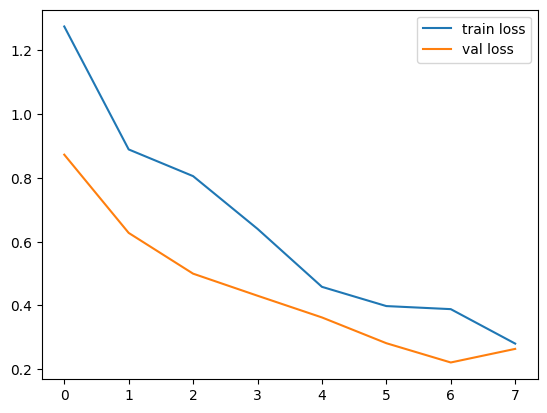

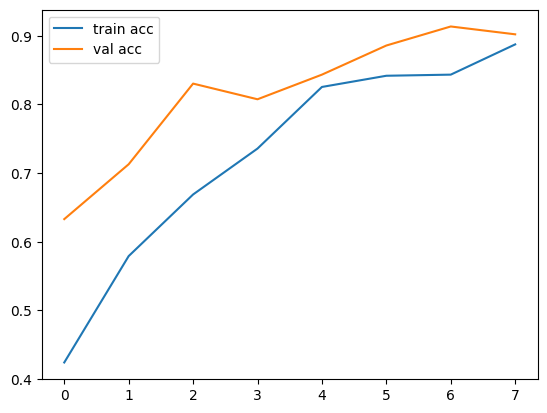

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('modelcancerlung.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Making Predictions**

In [ ]:
y_pred = model.predict(test_set)

20/20 [==============================] - 6s 241ms/step


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 1, 3, 3, 0, 2, 1, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 2, 2, 0, 3, 2,
       1, 3, 1, 0, 1, 3, 3, 3, 2, 2, 2, 3, 0, 2, 3, 1, 3, 2, 0, 3, 3, 0,
       0, 0, 3, 0, 2, 3, 3, 3, 0, 2, 2, 3, 2, 0, 2, 2, 2, 0, 3, 0, 2, 3,
       3, 1, 1, 3, 0, 2, 0, 0, 1, 0, 3, 0, 3, 2, 0, 1, 1, 3, 3, 2, 0, 3,
       3, 2, 3, 1, 2, 2, 2, 3, 0, 3, 2, 3, 0, 2, 0, 2, 0, 0, 0, 3, 0, 2,
       3, 0, 3, 3, 0, 0, 1, 1, 3, 2, 3, 2, 2, 0, 3, 2, 2, 0, 2, 1, 0, 3,
       0, 0, 3, 3, 3, 0, 1, 3, 2, 3, 3, 3, 3, 2, 3, 0, 2, 1, 2, 1, 3, 3,
       0, 3, 2, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3, 1, 1, 1, 3, 3,
       2, 1, 1, 0, 0, 0, 3, 0, 3, 0, 2, 1, 2, 1, 1, 3, 3, 2, 0, 0, 0, 3,
       1, 3, 1, 3, 2, 0, 1, 0, 0, 1, 3, 0, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1,
       2, 3, 2, 2, 3, 3, 3, 0, 3, 0, 0, 0, 2, 3, 3, 0, 0, 2, 3, 1, 3, 2,
       3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 1, 3, 1, 1, 3, 1, 3, 3, 0, 0, 3,
       0, 3, 0, 0, 2, 3, 3, 1, 0, 3, 3, 1, 0, 0, 3, 1, 2, 0, 0, 3, 0, 0,
       0, 3, 3, 1, 3, 0, 2, 1, 1, 3, 3, 3, 2, 2, 3,

In [ ]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma Lung Cancer"]

In [ ]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------Chest Cancer Type Detection---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 3s 3s/step
NO Lung Cancer/ NORMAL


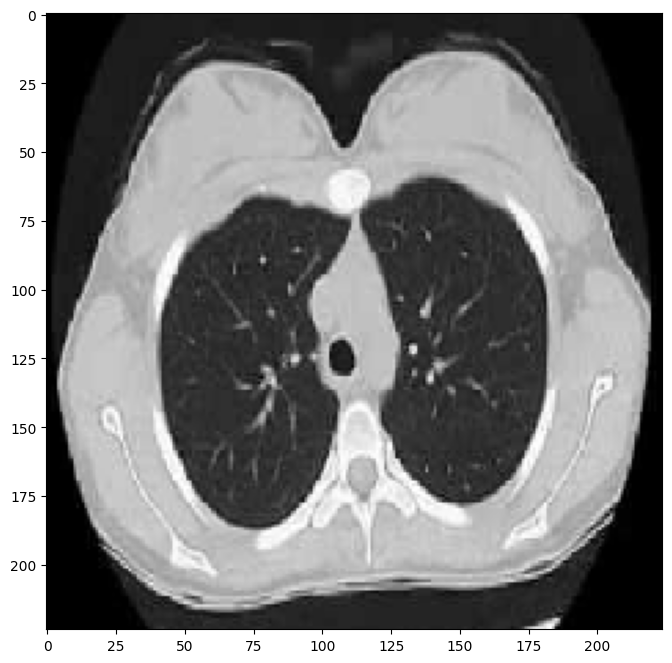

In [ ]:
im=image.load_img('/content/drive/MyDrive/train/normal/10.png',target_size=(224,224))
predict_image(im)

In [ ]:
im2=image.load_img('/content/Data/test/large.cell.carcinoma/000111.png',target_size=(224,224))
predict_image(im2)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Data/test/large.cell.carcinoma/000111.png'


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

Large cell carcinoma Lung Cancer


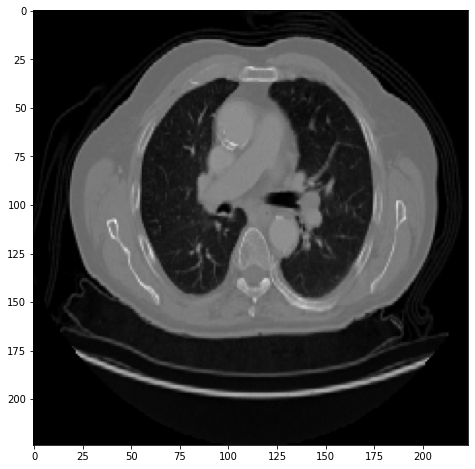

In [ ]:
im3=image.load_img('/content/Data/test/squamous.cell.carcinoma/000112.png',target_size=(224,224))
predict_image(im3)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

Squamous cell carcinoma Lung Cancer


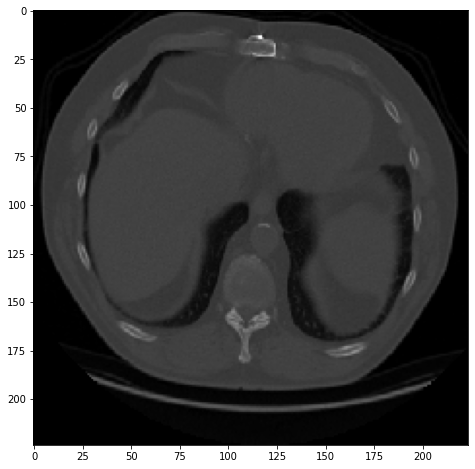

In [ ]:
im4=image.load_img('/content/Data/test/squamous.cell.carcinoma/000118 (3).png',target_size=(224,224))
predict_image(im4)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

NO Lung Cancer/ NORMAL


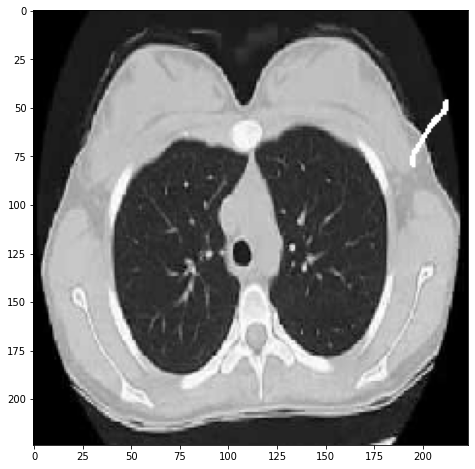

In [ ]:
im5=image.load_img('/content/Data/test/normal/10 - Copy.png',target_size=(224,224))
predict_image(im5)